<a href="https://colab.research.google.com/github/autitya/CAR-DETECTION/blob/master/OCR_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install img2table

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 0.20.2
    Uninstalling polars-0.20.2:
      Successfully uninstalled polars-0.20.2


In [ ]:
!pip install img2table[azure]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.2 MB/s eta 0:00:00


In [ ]:
! pip install "pypdfium2==4" pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.5 MB/s eta 0:00:00


In [ ]:
import pypdfium2 as pdfium

# Load a document
pdf = pdfium.PdfDocument("COA_Report_3818829-0.pdf")

# Loop over pages and render
for i in range(len(pdf)):
    page = pdf[i]
    image = page.render(scale=4).to_pil()
    image.save(f"output_{i:03d}.jpg")

In [ ]:
!git clone https://github.com/xavctn/img2table.git
!cp ./img2table/examples/utils.py ./utils.py

Cloning into 'img2table'...
remote: Enumerating objects: 2585, done.
remote: Counting objects: 100% (1002/1002), done.
remote: Compressing objects: 100% (554/554), done.
remote: Total 2585 (delta 679), reused 474 (delta 444), pack-reused 1583
Receiving objects: 100% (2585/2585), 6.05 MiB | 15.42 MiB/s, done.
Resolving deltas: 100% (1365/1365), done.


In [ ]:
import os
import cv2
from IPython.display import display_html, display
from PIL import Image as PILImage
from utils import display_borderless_tables

from img2table.document import Image
from img2table.ocr import TesseractOCR, PaddleOCR, VisionOCR, AzureOCR

In [ ]:
ocr = AzureOCR(endpoint="https://azure-ai-computer-vision-service.cognitiveservices.azure.com/",
               subscription_key="bf608de219934cd7b5cc096ec1bcb574")

In [ ]:
!wget https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-981-15-8530-2_19/MediaObjects/496441_1_En_19_Fig5_HTML.png

--2024-02-23 12:08:26--  https://media.springernature.com/lw685/springer-static/image/chp%3A10.1007%2F978-981-15-8530-2_19/MediaObjects/496441_1_En_19_Fig5_HTML.png
Resolving media.springernature.com (media.springernature.com)... 151.101.0.95, 151.101.64.95, 151.101.128.95, ...
Connecting to media.springernature.com (media.springernature.com)|151.101.0.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/png]
Saving to: ‘496441_1_En_19_Fig5_HTML.png’

496441_1_En_19_Fig5     [ <=>                ] 101.94K  --.-KB/s    in 0.08s   

2024-02-23 12:08:27 (1.22 MB/s) - ‘496441_1_En_19_Fig5_HTML.png’ saved [104388]



In [ ]:
img = Image("Spanish Doc.PNG")
# tesseract = TesseractOCR() #PaddleOCR()

# Extract tables with Tesseract and PaddleOCR
tables = img.extract_tables(ocr=ocr, borderless_tables=False)

tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,Lote (Granel),Descrição - drágea,Cianocobalamina\nIdentidade,- Tiamina\nMonoidratada,Identidade .\nPiridoxina,Cianocobalamina\nTeor Y\n(%),Teor . Piridoxina (%)\nmonoidratada (%)\nTeor ...,Dissolução (S1) (%),Dissolução - Valor\nminimo (%),Dissolução - Valor\nmáximo (%)
1,BR105026,Corresponde,"99\n104\n106,1\n101\nCorresponde\nCorresponde\...","99\n104\n106,1\n101\nCorresponde\nCorresponde\...","99\n104\n106,1\n101\nCorresponde\nCorresponde\...","99\n104\n106,1\n101\nCorresponde\nCorresponde\...","99\n104\n106,1\n101\nCorresponde\nCorresponde\...","99\n104\n106,1\n101\nCorresponde\nCorresponde\...","99\n104\n106,1\n101\nCorresponde\nCorresponde\...","99\n104\n106,1\n101\nCorresponde\nCorresponde\..."
2,BR105464\nBR105465,Corresponde,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...
3,BR105464\nBR105465,Corresponde,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...
4,BR105570,Corresponde,Corresponde,Corresponde,97\n36\n108\n10\nCorresponde\n103.9,97\n36\n108\n10\nCorresponde\n103.9,97\n36\n108\n10\nCorresponde\n103.9,97\n36\n108\n10\nCorresponde\n103.9,None,104
5,BR105676,Corresponde,Corresponde,Corresponde,Corresponde,112\n105,112\n105,90,97,102
6,BR105678,Corresponde,Corresponde,Corresponde,"99\nCorresponde\n111\n106,7\n100","99\nCorresponde\n111\n106,7\n100","99\nCorresponde\n111\n106,7\n100","99\nCorresponde\n111\n106,7\n100",99\n101,99\n101
7,BR105679,Corresponde,109.3\nCorresponde\nCorresponde\nCorresponde\n...,109.3\nCorresponde\nCorresponde\nCorresponde\n...,109.3\nCorresponde\nCorresponde\nCorresponde\n...,109.3\nCorresponde\nCorresponde\nCorresponde\n...,109.3\nCorresponde\nCorresponde\nCorresponde\n...,109.3\nCorresponde\nCorresponde\nCorresponde\n...,99\n103,99\n103
8,BR106347,Corresponde,Corresponde,Corresponde,"Corresponde\n106\n105.1\n3,5","Corresponde\n106\n105.1\n3,5","Corresponde\n106\n105.1\n3,5",99,96,102
9,BR106348,Corresponde,Corresponde,"111\n3.8\nCorresponde\nCorresponde\n111,3\n101","111\n3.8\nCorresponde\nCorresponde\n111,3\n101","111\n3.8\nCorresponde\nCorresponde\n111,3\n101","111\n3.8\nCorresponde\nCorresponde\n111,3\n101","111\n3.8\nCorresponde\nCorresponde\n111,3\n101",97,105


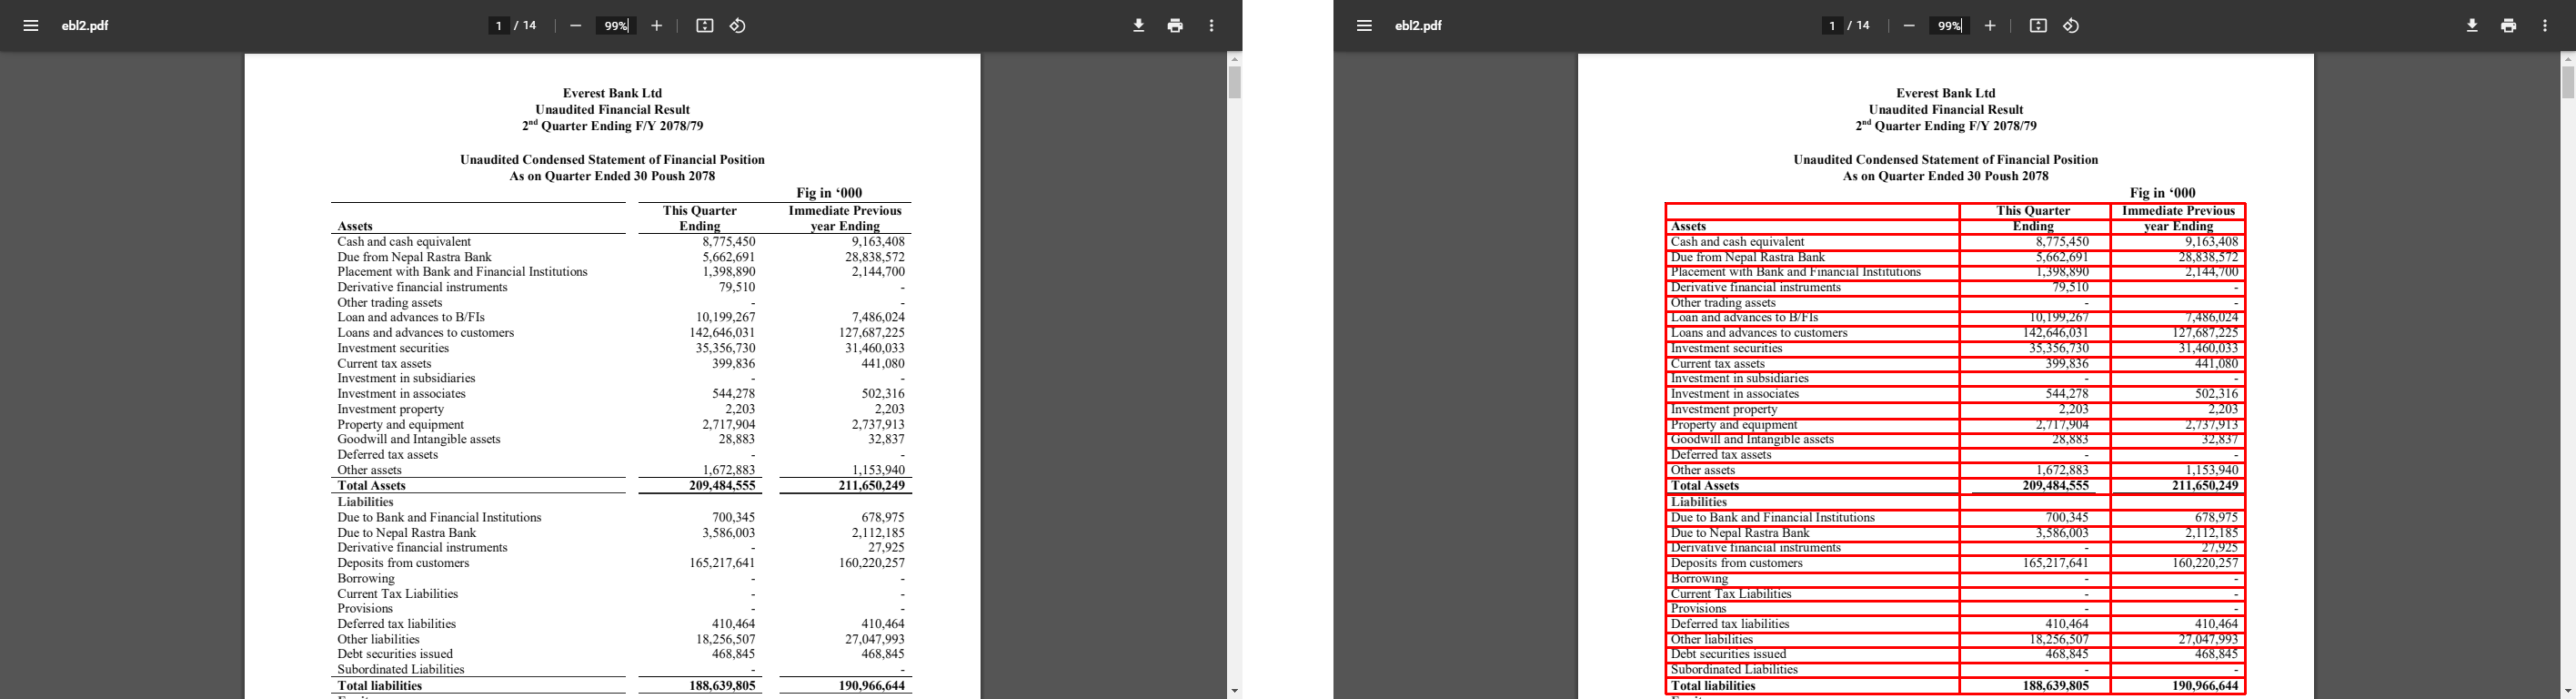

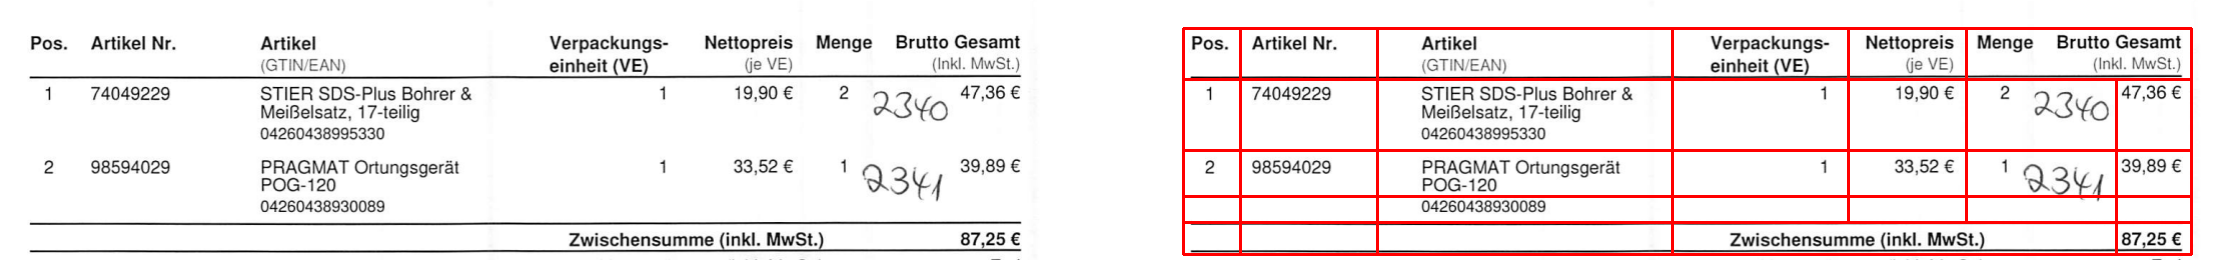

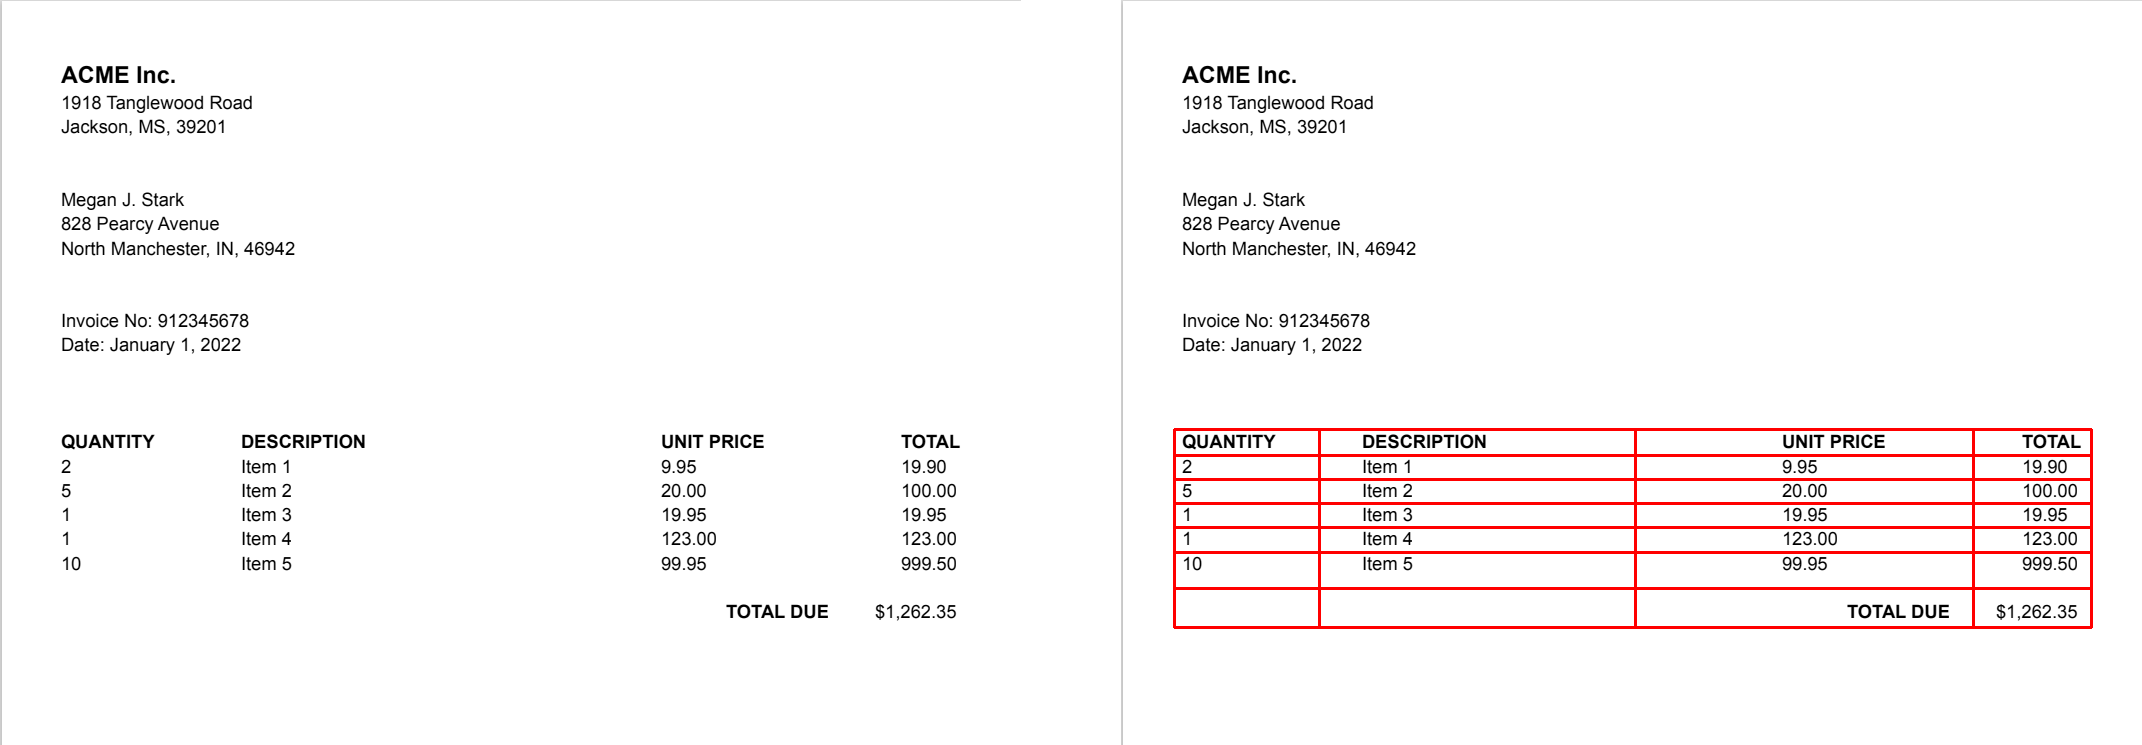

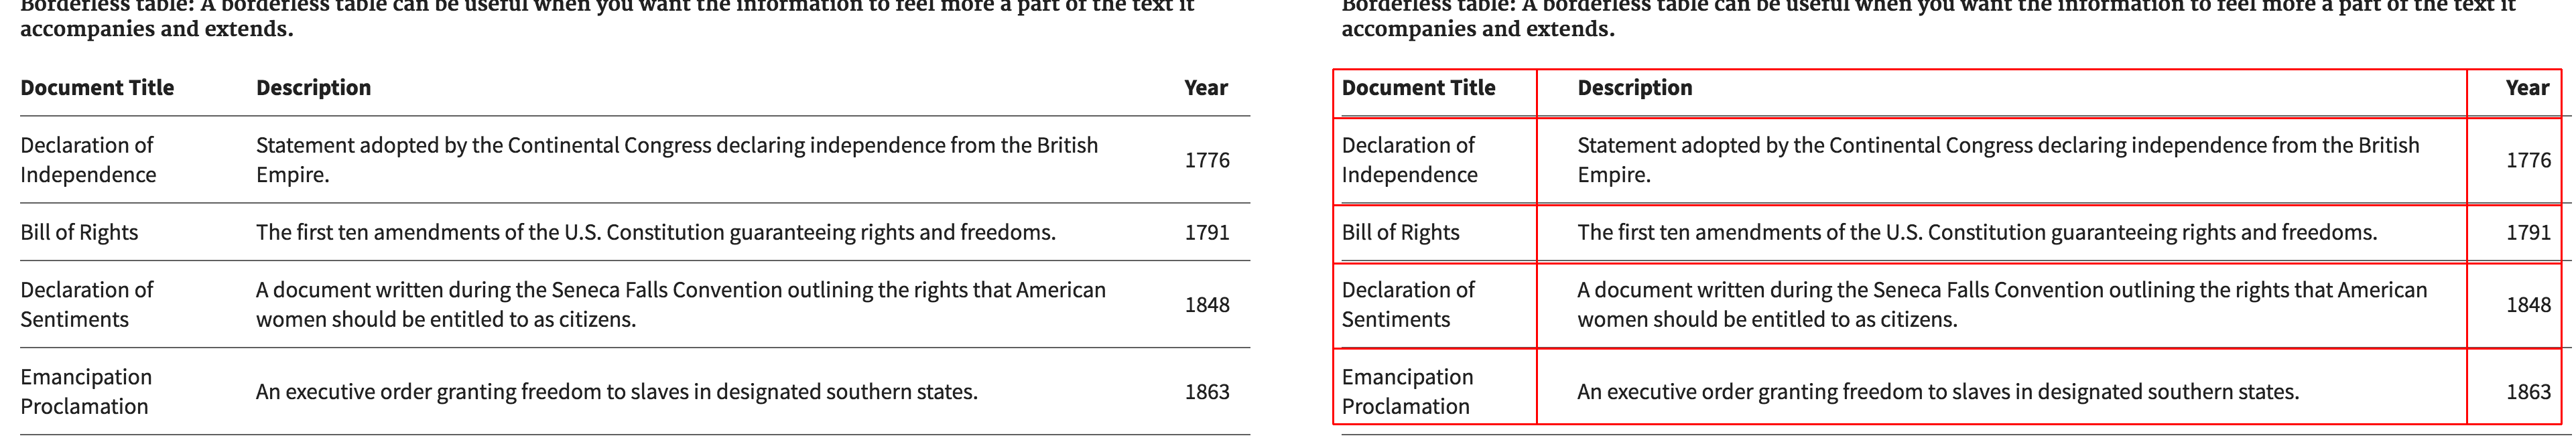

In [ ]:
for img_path in os.listdir("/content/img2table/examples/data/borderless"):
    img = Image(f"/content/img2table/examples/data/borderless/{img_path}")
    display_img = display_borderless_tables(img=img, ocr=tesseract)

    display(PILImage.fromarray(display_img))
    display_html("<hr>", raw=True)

In [ ]:
!sudo apt-get update
!sudo apt-get install libleptonica-dev tesseract-ocr libtesseract-dev python3-pil tesseract-ocr-eng tesseract-ocr-script-latn

In [ ]:
!pip install pdfplumber

In [ ]:
!pip install pytesseract

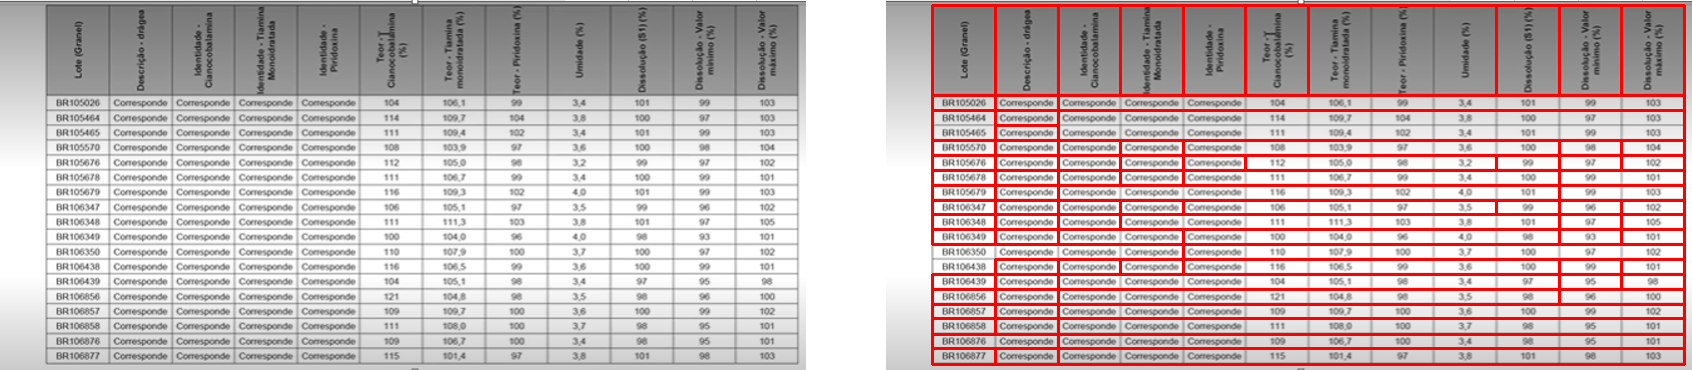

,0,1,2,3,4,5,6,7,8,9
0,Lote (Granel),Descrição - drágea,Cianocobalamina\nIdentidade,- Tiamina\nMonoidratada,Identidade .\nPiridoxina,Cianocobalamina\nTeor Y\n(%),Teor . Piridoxina (%)\nmonoidratada (%)\nTeor ...,Dissolução (S1) (%),Dissolução - Valor\nminimo (%),Dissolução - Valor\nmáximo (%)
1,BR105026,Corresponde,"99\n104\n106,1\n101\nCorresponde\nCorresponde\...","99\n104\n106,1\n101\nCorresponde\nCorresponde\...","99\n104\n106,1\n101\nCorresponde\nCorresponde\...","99\n104\n106,1\n101\nCorresponde\nCorresponde\...","99\n104\n106,1\n101\nCorresponde\nCorresponde\...","99\n104\n106,1\n101\nCorresponde\nCorresponde\...","99\n104\n106,1\n101\nCorresponde\nCorresponde\...","99\n104\n106,1\n101\nCorresponde\nCorresponde\..."
2,BR105464\nBR105465,Corresponde,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...
3,BR105464\nBR105465,Corresponde,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...,114\n109.7\n104\n100\n97\nCorresponde\n103\nCo...
4,BR105570,Corresponde,Corresponde,Corresponde,97\n36\n108\n10\nCorresponde\n103.9,97\n36\n108\n10\nCorresponde\n103.9,97\n36\n108\n10\nCorresponde\n103.9,97\n36\n108\n10\nCorresponde\n103.9,None,104
5,BR105676,Corresponde,Corresponde,Corresponde,Corresponde,112\n105,112\n105,90,97,102
6,BR105678,Corresponde,Corresponde,Corresponde,"99\nCorresponde\n111\n106,7\n100","99\nCorresponde\n111\n106,7\n100","99\nCorresponde\n111\n106,7\n100","99\nCorresponde\n111\n106,7\n100",99\n101,99\n101
7,BR105679,Corresponde,109.3\nCorresponde\nCorresponde\nCorresponde\n...,109.3\nCorresponde\nCorresponde\nCorresponde\n...,109.3\nCorresponde\nCorresponde\nCorresponde\n...,109.3\nCorresponde\nCorresponde\nCorresponde\n...,109.3\nCorresponde\nCorresponde\nCorresponde\n...,109.3\nCorresponde\nCorresponde\nCorresponde\n...,99\n103,99\n103
8,BR106347,Corresponde,Corresponde,Corresponde,"Corresponde\n106\n105.1\n3,5","Corresponde\n106\n105.1\n3,5","Corresponde\n106\n105.1\n3,5",99,96,102
9,BR106348,Corresponde,Corresponde,"111\n3.8\nCorresponde\nCorresponde\n111,3\n101","111\n3.8\nCorresponde\nCorresponde\n111,3\n101","111\n3.8\nCorresponde\nCorresponde\n111,3\n101","111\n3.8\nCorresponde\nCorresponde\n111,3\n101","111\n3.8\nCorresponde\nCorresponde\n111,3\n101",97,105


In [ ]:
# img = Image("output_000.jpg")
# display_img = display_borderless_tables(img=img, ocr=tesseract)
# display(PILImage.fromarray(display_img))
# tables = img.extract_tables(ocr=tesseract, borderless_tables=True)
# display(tables[1].df)
# display_html("<hr>", raw=True)
img = Image("Spanish Doc.PNG")
display_img = display_borderless_tables(img=img, ocr=ocr)
display(PILImage.fromarray(display_img))
tables = img.extract_tables(ocr=ocr, borderless_tables=False)
display(tables[0].df)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# load the input image and convert it to grayscale
image = cv2.imread('Spanish Doc.PNG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

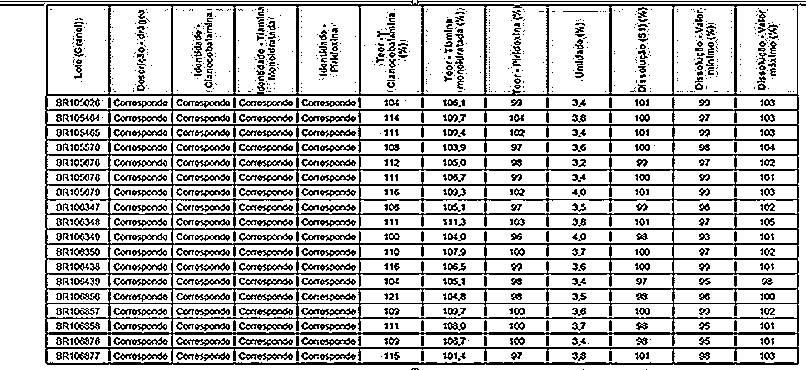

In [ ]:
thresh = cv2.adaptiveThreshold(sharpened_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,5)
cv2_imshow(thresh)

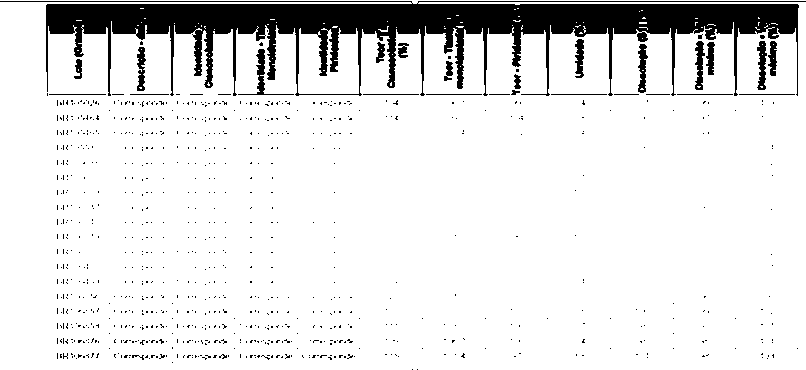

In [ ]:
ret2,th2 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
cv2_imshow(th2)

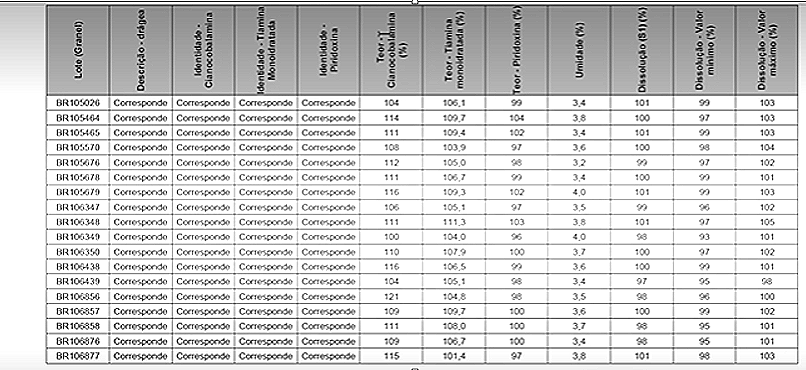

In [ ]:
alpha = 1.2 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)

adjusted = cv2.convertScaleAbs(sharpened_image, alpha=alpha, beta=beta)
cv2_imshow(adjusted)

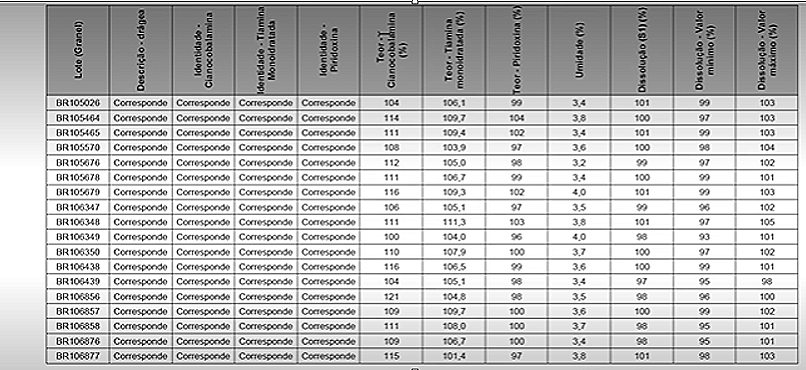

In [ ]:
import numpy as np
# Create the sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Sharpen the image
sharpened_image = cv2.filter2D(gray, -1, kernel)
cv2_imshow(sharpened_image)

In [ ]:
cv2.imwrite('spanish_tuned.png',sharpened_image)

True

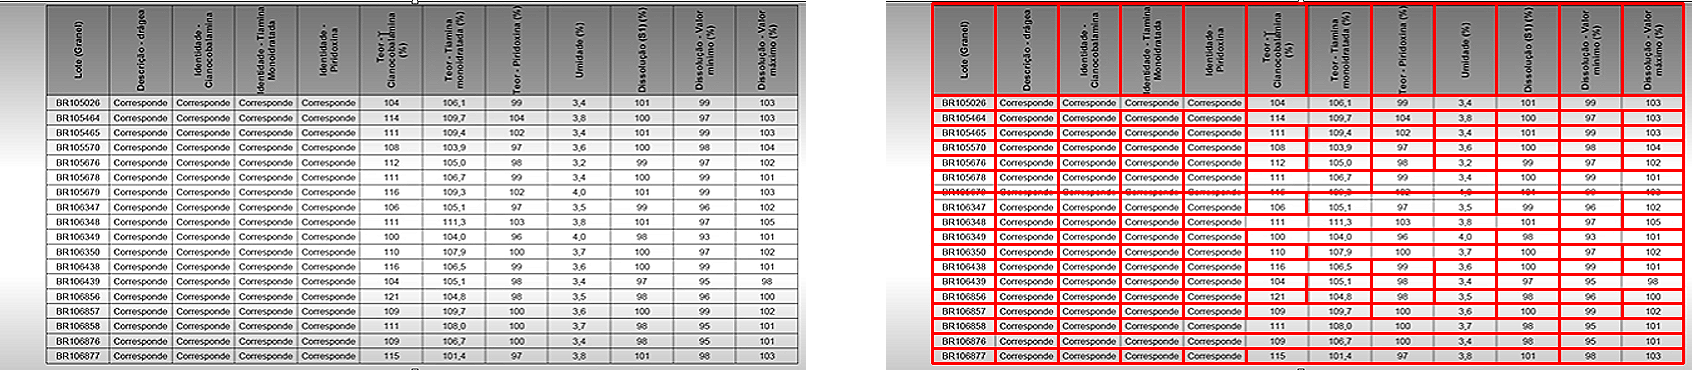

,0,1,2,3,4,5,6,7,8,9,10,11
0,Lote (Granol),Descrição dráges,Cianocobalamina\nIdentidade -,Identidade Tiamina\nMonoldmtada,Piridoxina\nIdentidade,Cianocobalamina\n(%)\nTeor,(%)\nTeor - Tomina,Teor Piridoxina (%),Umidade (%),(S1) (%),- Valor\nminimo (%),- Valor\n(%)
1,BR105026,Corresponde,Corresponde\nCorrespondo\nCorresponde,Corresponde\nCorrespondo\nCorresponde,Corresponde\nCorrespondo\nCorresponde,"104\n106,1","104\n106,1",3.4\n101,3.4\n101,3.4\n101,99\n103,99\n103
2,BR105464,Corresponde,Corresponde,Corresponde,Corresponde,109.7\n114,109.7\n114,10-,3.8,100,97,103
3,BR105465,Corresponde,Corresponde,Corresponde,Corresponde,111,100,102,None,101,None,103
4,BR105570,Corresponde,Corresponde,Corresponde,Corresponde,108,103.9,None,36,100,98,None
5,BR105070,Corresponde,Corresponde,Corresponde,Corresponde,112,105.0,98,"3,2",None,97,102
6,BR105078,Corresponde,Correspondo,Corresponde,Corresponde,"111\n106.7\n116\n109,3","111\n106.7\n116\n109,3","3.4\n102\n4,0","3.4\n102\n4,0",100\n101,101\n100,101\n100
7,BR105679\nBR 106347,Corresponde\nCorresponde,Corresponde\nCorresponde,Corresponde\nCorresponde,Corresponde\nCorresponde,106,105.\n97\n35,105.\n97\n35,105.\n97\n35,None,96,102
8,BR106348,Corresponde,Corresponde,Corresponde,"Corresponde\n111\n111,3\n103\n101","Corresponde\n111\n111,3\n103\n101","Corresponde\n111\n111,3\n103\n101","Corresponde\n111\n111,3\n103\n101","Corresponde\n111\n111,3\n103\n101","Corresponde\n111\n111,3\n103\n101",None,105
9,BR106349,Correspondo,Correspondo,Corresponde,Corresponde,4.0\n100\n104.0,4.0\n100\n104.0,4.0\n100\n104.0,4.0\n100\n104.0,None,90\n101,90\n101


In [ ]:
img = Image("spanish_tuned.png")
display_img = display_borderless_tables(img=img, ocr=ocr)
display(PILImage.fromarray(display_img))
tables = img.extract_tables(ocr=ocr, borderless_tables=False)
display(tables[0].df)

In [ ]:
!pip install ultralyticsplus==0.0.23 ultralytics==8.0.21

In [ ]:
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO('keremberke/yolov8m-table-extraction')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/161 [00:00<?, ?B/s]

best.pt:   0%|          | 0.00/52.0M [00:00<?, ?B/s]

In [ ]:
# set image
image = '496441_1_En_19_Fig5_HTML.png'

# perform inference
results = model.predict(image)

# observe results
print(results[0].boxes)
render = render_result(model=model, image=image, result=results[0])

Ultralytics YOLOv8.0.21 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/496441_1_En_19_Fig5_HTML.png: 640x512 1 bordered, 1 borderless, 89.1ms
Speed: 0.9ms pre-process, 89.1ms inference, 756.1ms postprocess per image at shape (1, 3, 640, 640)


tensor([[3.10000e+01, 4.49000e+02, 6.85000e+02, 6.47000e+02, 6.32925e-01, 1.00000e+00],
        [2.90000e+01, 4.45000e+02, 6.78000e+02, 6.47000e+02, 4.73597e-01, 0.00000e+00]], device='cuda:0')


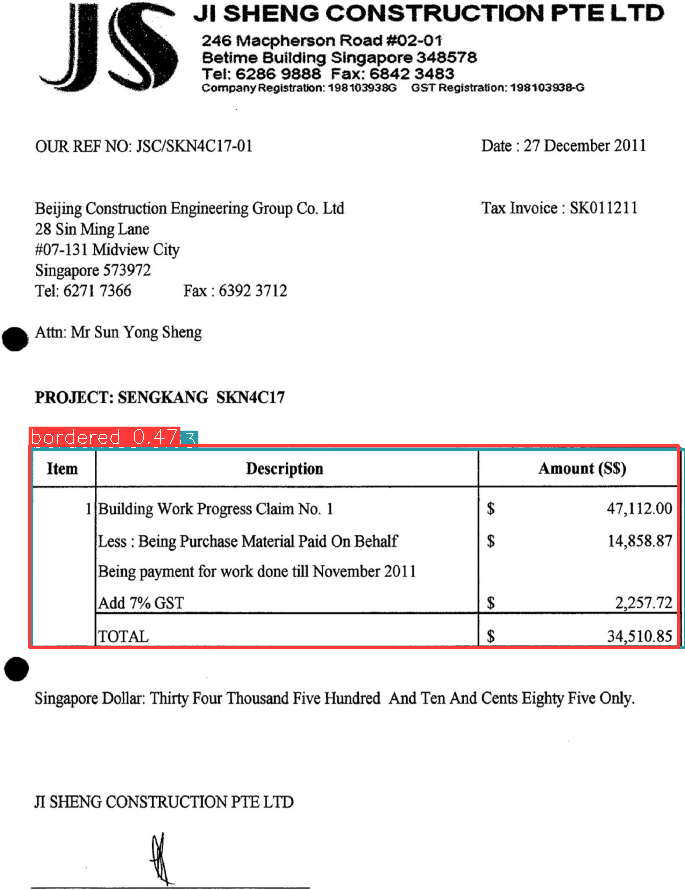

In [ ]:
render

In [ ]:
from IPython.display import display

# Assuming the variable df contains the relevant DataFrame


In [ ]:
import pdfplumber
import pandas as pd
with pdfplumber.open("example_merged.pdf") as pdf:
    first_page = pdf.pages[0]
    #print(first_page.extract_table())
    table2df = lambda table: pd.DataFrame(table[1:], columns=table[0])
    tables = table2df(first_page.extract_table())
    display(tables)

,item,index,None,Testing method
0,None,Grain,Other,None
1,CHOHa\n3,0.6,2.0,GB/T 5009.48
2,HCNa,8.0,None,GB/T 5009.48
3,aSome notes,None,None,None


In [ ]:
pdf.pages[0].chars

In [ ]:
!pip install camelot-py
!pip install ghostscript

In [ ]:
import camelot

In [ ]:
tables = camelot.read_pdf("COA_Report_3818829-0.pdf", pages='all')

In [ ]:
df = tables[1].df
df.columns = df.iloc[0]
display(df.style.set_properties(**{
    'white-space': 'pre-wrap',
}))

IndexError: list index out of range

In [ ]:
!pip install pypdf2==2.12.1
!apt install ghostscript

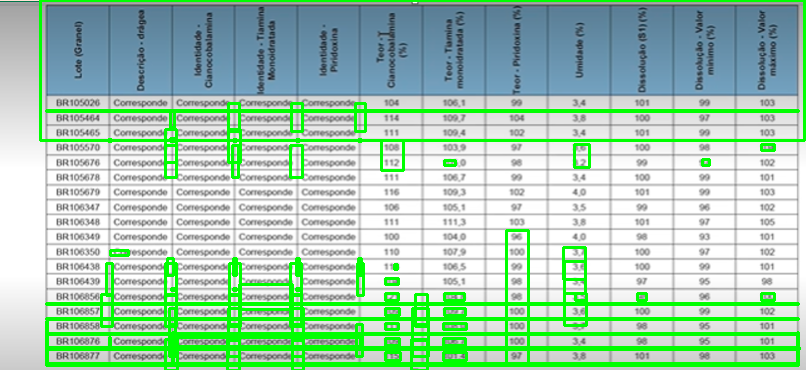

-1

In [ ]:
import cv2
import pytesseract
from pytesseract import Output
from google.colab.patches import cv2_imshow

img = cv2.imread('Spanish Doc.PNG')
# Adding custom options
custom_config = r'--oem 3 --psm 6'
#d = pytesseract.image_to_data(img, output_type=Output.DICT,config=custom_config)
d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 40:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

In [ ]:
!pip install pytesseract opencv-python

In [ ]:
#!pip install paddlepaddle-gpu
!pip install paddleocr

In [ ]:
import paddle
paddle.utils.run_check()

Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 GPU.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.


In [ ]:
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `french`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory
img_path = 'PaddleOCR/doc/imgs_en/img_12.jpg'
result = ocr.ocr('Spanish Doc.PNG', cls=True)
# draw result
from PIL import Image
image = Image.open('Spanish Doc.PNG').convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores)
im_show = Image.fromarray(im_show)
#im_show.save('result.jpg')
display(im_show)

In [ ]:
!pip install opencv-python

In [ ]:
result

[[[[[200.0, 10.0], [218.0, 10.0], [218.0, 92.0], [200.0, 92.0]],
   ('Cianocobalamina', 0.9706277847290039)],
  [[[71.0, 16.0], [88.0, 16.0], [88.0, 83.0], [71.0, 83.0]],
   ('Lote (Granel)', 0.8896155953407288)],
  [[[571.0, 17.0], [588.0, 17.0], [588.0, 83.0], [571.0, 83.0]],
   ('%', 0.8541831374168396)],
  [[[395.0, 39.0], [410.0, 39.0], [410.0, 64.0], [395.0, 64.0]],
   ('(%)', 0.8047874569892883)],
  [[[55.0, 97.0], [102.0, 97.0], [102.0, 108.0], [55.0, 108.0]],
   ('BR105026', 0.9812884330749512)],
  [[[113.0, 97.0], [168.0, 97.0], [168.0, 108.0], [113.0, 108.0]],
   ('Corresponde', 0.9961843490600586)],
  [[[175.0, 97.0], [231.0, 97.0], [231.0, 108.0], [175.0, 108.0]],
   ('Corresponde', 0.968430757522583)],
  [[[239.0, 97.0], [293.0, 97.0], [293.0, 108.0], [239.0, 108.0]],
   ('Corresponde', 0.9953228235244751)],
  [[[300.0, 97.0], [356.0, 97.0], [356.0, 108.0], [300.0, 108.0]],
   ('Corresponde', 0.9672487378120422)],
  [[[381.0, 95.0], [402.0, 95.0], [402.0, 111.0], [381.0, 

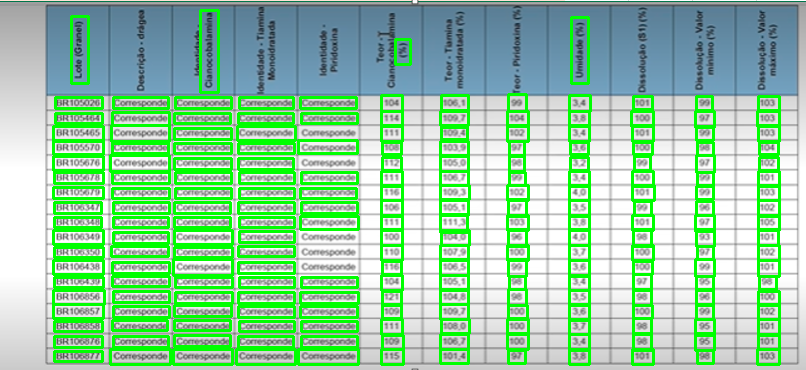

-1

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('Spanish Doc.PNG')
# n_boxes = len(result[0])
for i in result[0]:
    # if int(d['conf'][i]) > 40:
    s,e = tuple(map(int, i[0][0])) , tuple(map(int, i[0][2]))
    img = cv2.rectangle(img, s, e, (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

In [ ]:
for i in result[0]:
  print(i)

[[[200.0, 10.0], [218.0, 10.0], [218.0, 92.0], [200.0, 92.0]], ('Cianocobalamina', 0.9706277847290039)]
[[[71.0, 16.0], [88.0, 16.0], [88.0, 83.0], [71.0, 83.0]], ('Lote (Granel)', 0.8896155953407288)]
[[[571.0, 17.0], [588.0, 17.0], [588.0, 83.0], [571.0, 83.0]], ('%', 0.8541831374168396)]
[[[395.0, 39.0], [410.0, 39.0], [410.0, 64.0], [395.0, 64.0]], ('(%)', 0.8047874569892883)]
[[[55.0, 97.0], [102.0, 97.0], [102.0, 108.0], [55.0, 108.0]], ('BR105026', 0.9812884330749512)]
[[[113.0, 97.0], [168.0, 97.0], [168.0, 108.0], [113.0, 108.0]], ('Corresponde', 0.9961843490600586)]
[[[175.0, 97.0], [231.0, 97.0], [231.0, 108.0], [175.0, 108.0]], ('Corresponde', 0.968430757522583)]
[[[239.0, 97.0], [293.0, 97.0], [293.0, 108.0], [239.0, 108.0]], ('Corresponde', 0.9953228235244751)]
[[[300.0, 97.0], [356.0, 97.0], [356.0, 108.0], [300.0, 108.0]], ('Corresponde', 0.9672487378120422)]
[[[381.0, 95.0], [402.0, 95.0], [402.0, 111.0], [381.0, 111.0]], ('104', 0.9777776598930359)]
[[[441.0, 95.0], [

In [ ]:
!pip install deepdoctection[tf]
!pip install timm
!apt-get install poppler-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.3/410.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.3/296.3 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.6 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 1s (222 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
import deepdoctection as dd
from IPython.core.display import HTML
from matplotlib import pyplot as plt

analyzer = dd.get_dd_analyzer()  # instantiate the built-in analyzer similar to the Hugging Face space demo

df = analyzer.analyze(path = "5482697d-3000-49e1-a44f-9ed5cf3f75de.pdf")  # setting up pipeline
df.reset_state()                 # Trigger some initialization



[0226 09:16.57 @saver.py:1413]  INF  Restoring parameters from /root/.cache/deepdoctection/weights/layout/model-800000_inf_only


[0226 09:16:58 @varmanip.py:214] Checkpoint path /root/.cache/deepdoctection/weights/item/model-1620000_inf_only.data-00000-of-00001 is auto-corrected to /root/.cache/deepdoctection/weights/item/model-1620000_inf_only.
[0226 09:17:03 @sessinit.py:114] Restoring checkpoint from /root/.cache/deepdoctection/weights/item/model-1620000_inf_only ...


[0226 09:17.03 @saver.py:1413]  INF  Restoring parameters from /root/.cache/deepdoctection/weights/item/model-1620000_inf_only


[0226 09:17:04 @varmanip.py:214] Checkpoint path /root/.cache/deepdoctection/weights/cell/model-1800000_inf_only.data-00000-of-00001 is auto-corrected to /root/.cache/deepdoctection/weights/cell/model-1800000_inf_only.
[0226 09:17:08 @sessinit.py:114] Restoring checkpoint from /root/.cache/deepdoctection/weights/cell/model-1800000_inf_only ...


[0226 09:17.08 @saver.py:1413]  INF  Restoring parameters from /root/.cache/deepdoctection/weights/cell/model-1800000_inf_only


[0226 09:17.14 @doctectionpipe.py:84]  INF  Processing 5482697d-3000-49e1-a44f-9ed5cf3f75de_0.pdf
[0226 09:17.22 @context.py:126]  INF  ImageLayoutService total: 6.2493 sec.
[0226 09:17.27 @context.py:126]  INF  SubImageLayoutService total: 5.4197 sec.
[0226 09:17.31 @context.py:126]  INF  SubImageLayoutService total: 3.8115 sec.
[0226 09:17.31 @context.py:126]  INF  TableSegmentationService total: 0.0245 sec.
[0226 09:17.31 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0226 09:17.31 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0226 09:17.31 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0226 09:17.31 @maputils.py:90]  WRN  MappingContextManager error. Will filter annotation
[0226 09:17.31 @context.py:126]  INF  TableSegmentationRefinementService total: 0.0142 sec.
[0226 09:17.33 @context.py:126]  INF  TextExtractionService total: 1.5544 sec.
[0226 09:17.33 @context.py:126]  INF  MatchingService t

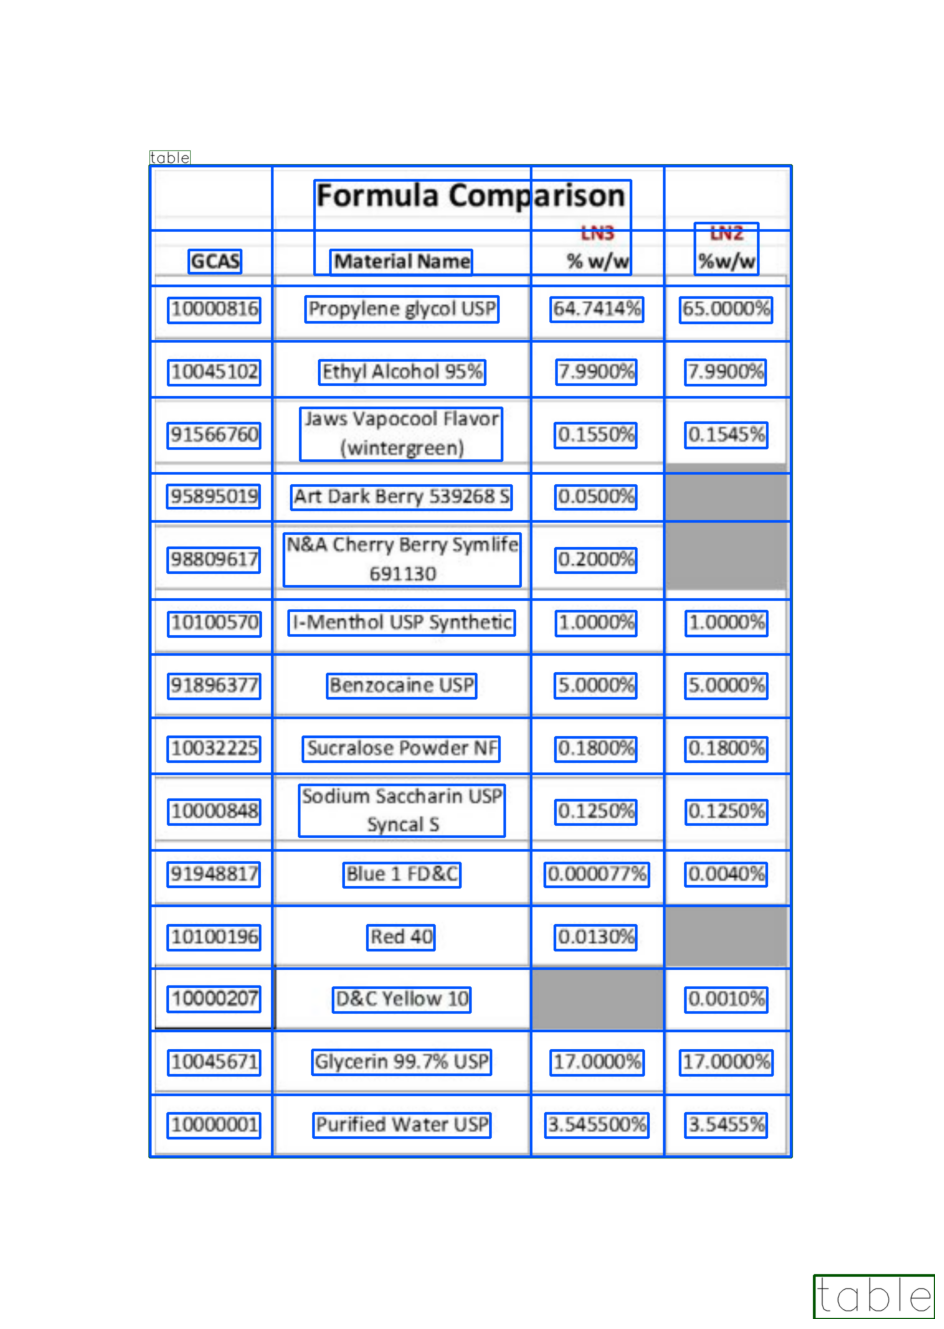

In [ ]:
doc = iter(df)
page = next(doc)

image = page.viz()
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

In [ ]:
HTML(page.tables[0].html)

[0226 09:17.43 @view.py:296]  WRN  html construction not possible


In [ ]:
import pandas as pd

df = pd.read_html(page.tables[0].html)

[0226 09:18.09 @view.py:296]  WRN  html construction not possible


In [ ]:
df[0]

,0,1,2,3
0,NaN,Formula Comparison LN3 % w/w,Formula Comparison LN3 % w/w,NaN
1,GCAS,Formula Comparison LN3 % w/w,Formula Comparison LN3 % w/w,Material Name
2,10000816,NaN,NaN,65.0000%
3,10045102,Ethyl Alcohol 95%,"7,.9900%",7.9900%
4,91566760,Jaws Vapocool Flavor (wintergreen),0.1550%,0.1545%
5,95895019,Art Dark Berry 539268 S,NaN,NaN
6,98809617,NaN,NaN,NaN
7,10100570,NaN,NaN,"1,0000%"
8,91896377,NaN,NaN,5.0000%
9,10032225,NaN,NaN,0.1800%


In [ ]:
# load the input image and convert it to grayscale
import numpy as np
img = cv2.imread('Spanish Doc.PNG')
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# # threshold the image using Otsu's thresholding method
# thresh = cv2.threshold(gray, 0, 255,
# 	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
# dist = cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
# dist = (dist * 255).astype("uint8")
# from google.colab.patches import cv2_imshow
# cv2_imshow(dist)
norm_img = np.zeros((img.shape[0], img.shape[1]))
img = cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)

In [ ]:
def deskew(image):
  co_ords = np.column_stack(np.where(image > 0))
  angle = cv2.minAreaRect(co_ords)[-1]
  if angle < -45:
    angle = -(90 + angle)
  else:
    angle = -angle
  (h, w) = image.shape[:2]
  center = (w // 2, h // 2)
  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC,
  borderMode=cv2.BORDER_REPLICATE)
  return rotated

In [ ]:
from PIL import Image

def set_image_dpi(file_path):
  im = Image.open(file_path)
  length_x, width_y = im.size
  factor = min(1, float(1024.0 / length_x))
  size = int(factor * length_x), int(factor * width_y)
  im_resized = im.resize(size, Image.ANTIALIAS)
  temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.png')
  temp_filename = temp_file.name
  im_resized.save(temp_filename, dpi=(300, 300))
  return temp_filename

In [ ]:
def remove_noise(image):
  return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15)

In [ ]:
#img = cv2.imread(‘j.png’,0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)

In [ ]:
set_image_dpi('Spanish Doc.PNG')

NameError: name 'tempfile' is not defined

In [ ]:
cv2_imshow(deskew(img))

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/convhull.cpp:143: error: (-215:Assertion failed) total >= 0 && (depth == CV_32F || depth == CV_32S) in function 'convexHull'


In [ ]:
!nvidia-smi

Thu Feb 29 14:20:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 38.8 MB/s eta 0:00:00


In [ ]:
import easyocr
reader = easyocr.Reader(['en','es'])
result = reader.readtext('Spanish Doc.PNG')

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
result

[([[637, 7], [649, 7], [649, 43], [637, 43]], '1', 0.7546121917784063),
 ([[73, 21], [85, 21], [85, 81], [73, 81]], '1', 0.8220263399061345),
 ([[193, 29], [213, 29], [213, 89], [193, 89]], '1]', 0.2461683157308561),
 ([[268, 20], [276, 20], [276, 80], [268, 80]], '|', 0.569829523015656),
 ([[329, 27], [341, 27], [341, 75], [329, 75]], '1', 0.956758669032812),
 ([[388, 50], [396, 50], [396, 88], [388, 88]], '1', 0.5810664172988709),
 ([[444, 18], [452, 18], [452, 82], [444, 82]], '1', 0.05949423236664675),
 ([[576, 40], [584, 40], [584, 78], [576, 78]], '1', 0.6319411566409059),
 ([[758, 40], [766, 40], [766, 90], [758, 90]], '|', 0.63025148870679),
 ([[55, 97], [103, 97], [103, 109], [55, 109]],
  'BR 103020',
  0.2560445349729729),
 ([[112, 96], [169, 96], [169, 110], [112, 110]],
  'Cononporo',
  0.12601403508446193),
 ([[176, 98], [220, 98], [220, 106], [176, 106]],
  'corlon',
  0.040216174067729475),
 ([[238, 98], [292, 98], [292, 106], [238, 106]],
  'Conlcon',
  0.0297945691418